In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
df = pd.read_csv('full_feature_data.csv')

In [17]:
print(df.columns.tolist())

['timestamp', 'symbol', 'open', 'high', 'low', 'close', 'volume', 'trade_count', 'vwap', 'ema_5', 'ema_9', 'ema_20', 'ema_30', 'ema_50', 'ema_75', 'ema_100', 'ema_150', 'ema_200', 'price_ema9_dist', 'ema9_ema20_dist', 'ema_slope_9', 'ema_slope_20', 'bb_bbm', 'bb_bbh', 'bb_bbl', 'bb_width', 'bb_close_above', 'bb_close_below', 'stoch_rsi', 'williams_r', 'mfi', 'obv', 'candle_body', 'candle_range', 'upper_wick', 'lower_wick', 'is_green', 'rsi_14', 'macd', 'macd_signal', 'macd_diff', 'close_lag1', 'close_lag2', 'volume_lag1', 'volume_lag2', 'rsi_14_lag1', 'rsi_14_lag2', 'macd_diff_lag1', 'macd_diff_lag2', 'is_2h_high', 'is_2h_low']


In [18]:
# Define features 
features = df.select_dtypes(include=['float64', 'int64'])

# Drop rows with any nulls in features or target
df = df.dropna(subset=features.columns.tolist() + ['is_2h_high'])

# Drop target columns from features
features = features.drop(columns=['is_2h_high', 'is_2h_low'], errors='ignore')

# extract the target
target = df['is_2h_high']


Classification Report:
               precision    recall  f1-score   support

       False       0.94      1.00      0.97        33
        True       1.00      0.60      0.75         5

    accuracy                           0.95        38
   macro avg       0.97      0.80      0.86        38
weighted avg       0.95      0.95      0.94        38

Confusion Matrix:
 [[33  0]
 [ 2  3]]


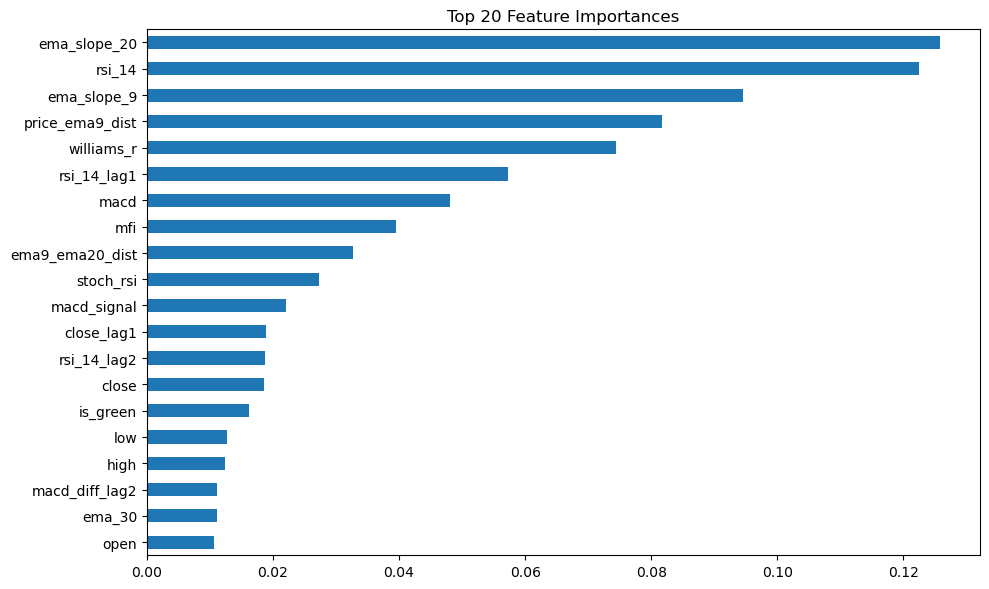

In [19]:
# Drop rows with missing values from the full DataFrame first
df = df.dropna(subset=['is_2h_high'])  # or 'is_2h_low' if that’s your target

# Then define features (drop targets after NaNs are cleared)
features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['is_2h_high', 'is_2h_low'], errors='ignore')
target = df['is_2h_high']  # or 'is_2h_low'

# Now proceed safely with train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 1: Select features and target
X = features
y = df['is_2h_high']  # or 'is_2h_low'

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predictions and evaluation
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 5: Feature Importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Plot top 20 features
plt.figure(figsize=(10, 6))
importances.head(20).plot(kind='barh')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [20]:
importances.head(20).to_csv("top_20_features.csv")

In [21]:
probs = model.predict_proba(X_test)[:, 1]
top_n_indices = probs.argsort()[-3:][::-1]  # top 3 high-probability predictions
df.iloc[top_n_indices][['timestamp', 'close', 'is_2h_high']]

,timestamp,close,is_2h_high
221,2025-07-16 13:12:00-04:00,33.745,True
212,2025-07-16 13:03:00-04:00,33.555,False
220,2025-07-16 13:11:00-04:00,33.715,True


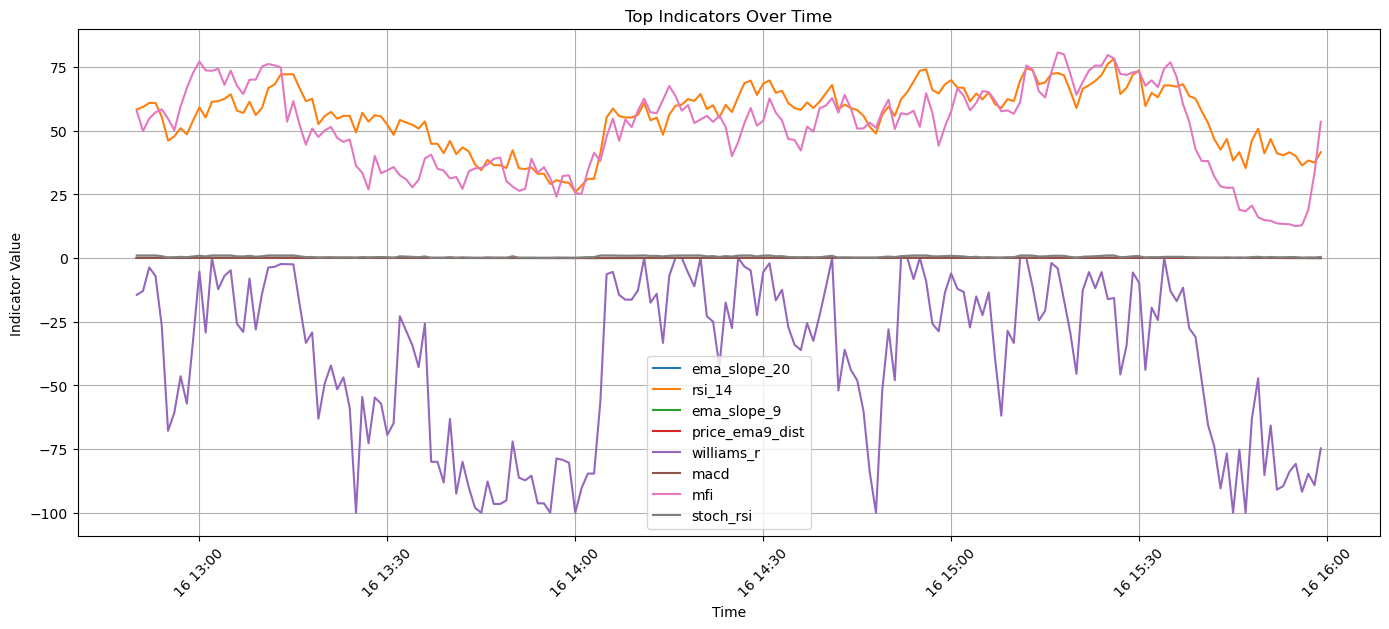

In [26]:
import matplotlib.pyplot as plt

# Features you want to plot
indicator_cols = [
    'ema_slope_20', 'rsi_14', 'ema_slope_9', 'price_ema9_dist',
    'williams_r', 'macd', 'mfi', 'stoch_rsi'
]

# Convert timestamp to datetime if not already
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Drop NaNs for clean plotting
df_plot = df[['timestamp'] + indicator_cols].dropna()

# Plot
plt.figure(figsize=(14, 6))
for col in indicator_cols:
    plt.plot(df_plot['timestamp'], df_plot[col], label=col)

plt.title('Top Indicators Over Time')
plt.xlabel('Time')
plt.ylabel('Indicator Value')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
